# <span style = "color:green"> Text-Based Emotion Detection</span>

***

Emotion detection (ED) is a brach of sentiment analysis that deals with the extraction and analysis of emotions. The evolution of web 2.0 has put text mining and analysis at the frontiers of organizational success. It helps service provider provide tailor-made services to their customers. Numerous studies are being carried out in the area of text mining and analysis due to the ease in sourcing for data and the vast benefits its deliverable offers.

### Content

There are two columns
* Text
* Emotion

The emotions column has various categories ranging from happiness to sadness to love and fear.

## Let's Begin

### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import nltk
import re

### Read 'Emotion_final.csv' and store it in a dataframe variable

In [47]:
df=pd.read_csv('Emotion_final.csv')

### View head

In [5]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


### Print some of the texts

In [48]:
for i in df['Text'].head(10):
    print(i)

i didnt feel humiliated
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
im grabbing a minute to post i feel greedy wrong
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
i am feeling grouchy
ive been feeling a little burdened lately wasnt sure why that was
ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
i feel as confused about life as a teenager or as jaded as a year old man
i have been with petronas for years i feel that petronas has performed well and made a huge profit
i feel romantic too


i didnt feel humiliated
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
im grabbing a minute to post i feel greedy wrong
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
i am feeling grouchy
ive been feeling a little burdened lately wasnt sure why that was
ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
i feel as confused about life as a teenager or as jaded as a year old man
i have been with petronas for years i feel that petronas has performed well and made a huge profit
i feel romantic too


### Check unique values in Emotion

In [49]:

pd.unique(df['Emotion'])

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

### View info of the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


### Check for null values, Remove if any

In [13]:
df.isna().sum()

Text       0
Emotion    0
dtype: int64

Text       0
Emotion    0
dtype: int64

### Check for duplicates, Remove if any

In [14]:
df.duplicated().sum()


3

3

In [50]:
df.drop_duplicates(inplace=True)

In [51]:
df.duplicated().sum()


0

0

### Print some of the happy text

In [52]:
a=df[df['Emotion']=='happy']
for i in a['Text'].head(10):

    print(i)
    print()

i have been with petronas for years i feel that petronas has performed well and made a huge profit

i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter

i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious

i do not feel reassured anxiety is on each side

i have the feeling she was amused and delighted

i was able to help chai lifeline with your support and encouragement is a great feeling and i am so glad you were able to help me

i feel more superior dead chicken or grieving child

i get giddy over feeling elegant in a perfectly fitted pencil skirt

i can t imagine a real life scenario where i would be emotionally connected enough with someone to feel totally accepted and safe where it it morally acceptable for me to have close and prolonged physical contact and w

i have been with petronas for years i feel that petronas has performed well and made a huge profit

i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter

i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious

i do not feel reassured anxiety is on each side

i have the feeling she was amused and delighted

i was able to help chai lifeline with your support and encouragement is a great feeling and i am so glad you were able to help me

i feel more superior dead chicken or grieving child

i get giddy over feeling elegant in a perfectly fitted pencil skirt

i can t imagine a real life scenario where i would be emotionally connected enough with someone to feel totally accepted and safe where it it morally acceptable for me to have close and prolonged physical contact and w

### Print some of the sadness texts

In [33]:
a=df[df['Emotion']=='sadness']
for i in a['Text'].head(10):

    print(i)
    print()

i didnt feel humiliated

i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake

ive been feeling a little burdened lately wasnt sure why that was

i feel like i have to make the suffering i m seeing mean something

i feel low energy i m just thirsty

i didnt really feel that embarrassed

i feel pretty pathetic most of the time

i started feeling sentimental about dolls i had as a child and so began a collection of vintage barbie dolls from the sixties

i still love my so and wish the best for him i can no longer tolerate the effect that bm has on our lives and the fact that is has turned my so into a bitter angry person who is not always particularly kind to the people around him when he is feeling stressed

i feel so inhibited in someone elses kitchen like im painting on someone elses picture



i didnt feel humiliated

i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake

ive been feeling a little burdened lately wasnt sure why that was

i feel like i have to make the suffering i m seeing mean something

i feel low energy i m just thirsty

i didnt really feel that embarrassed

i feel pretty pathetic most of the time

i started feeling sentimental about dolls i had as a child and so began a collection of vintage barbie dolls from the sixties

i still love my so and wish the best for him i can no longer tolerate the effect that bm has on our lives and the fact that is has turned my so into a bitter angry person who is not always particularly kind to the people around him when he is feeling stressed

i feel so inhibited in someone elses kitchen like im painting on someone elses picture



### Print some of the surpise texts

In [34]:
a=df[df['Emotion']=='surprise']
for i in a['Text'].head(10):

    print(i)
    print()

ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny

i have seen heard and read over the past couple of days i am left feeling impressed by more than a few companies

i keep feeling pleasantly surprised at his supportiveness and also his ease in new situations

i am now nearly finished the week detox and i feel amazing

i too feel as if i am a stranger in a strange land and i am raising my son in a place that is not his father s ancestral home

i started feeling funny and then friday i woke up sick as a dog

im certainly not going to sit and tell you whats going on in my personal life but i feel that if you were ever curious about whats going in my life all youd have to do is watch the show

im sorry that there wasnt more humor in this post but im not feeling all that funny

i want to hold this feeling of shocked awe and wonder forever

i will enclose her verses on her could not weigh much more thinking and feeling 

ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny

i have seen heard and read over the past couple of days i am left feeling impressed by more than a few companies

i keep feeling pleasantly surprised at his supportiveness and also his ease in new situations

i am now nearly finished the week detox and i feel amazing

i too feel as if i am a stranger in a strange land and i am raising my son in a place that is not his father s ancestral home

i started feeling funny and then friday i woke up sick as a dog

im certainly not going to sit and tell you whats going on in my personal life but i feel that if you were ever curious about whats going in my life all youd have to do is watch the show

im sorry that there wasnt more humor in this post but im not feeling all that funny

i want to hold this feeling of shocked awe and wonder forever

i will enclose her verses on her could not weigh much more thinking and feeling 

### Plot a countplot of Emotions

C:\Users\hp\AppData\Local\Temp\ipykernel_15240\2705196226.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Emotion',data=df,palette='hot')


<Axes: xlabel='count', ylabel='Emotion'>

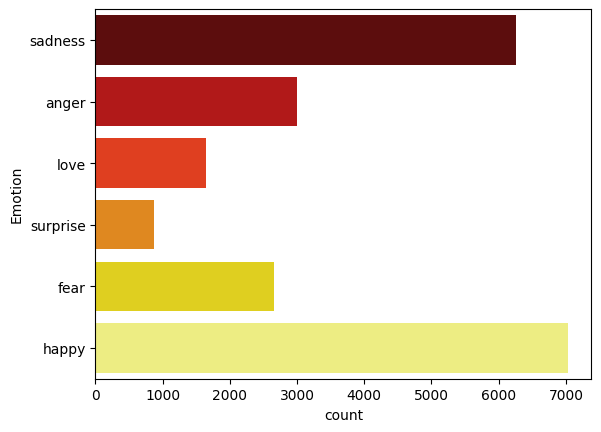

In [36]:
sns.countplot(y='Emotion',data=df,palette='hot')

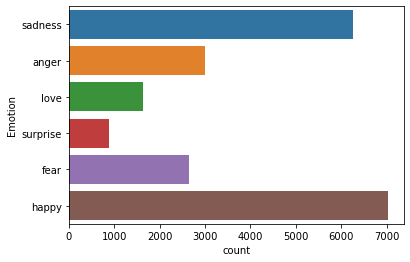

### Convert Emotions column to numerical values using Label encoder

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
labelencoder=LabelEncoder()

In [55]:
df['Emotion']=labelencoder.fit_transform(df['Emotion'])

In [56]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0


,Text,Emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0


### Store the classes in a list
* use le.classes_ to fetch the classes

In [42]:
labelencoder.classes_

array(['anger', 'fear', 'happy', 'love', 'sadness', 'surprise'],
      dtype=object)

['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']

### Import WordNetLemmatizer, stopwords

In [57]:
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

### Create a function to preprocess the text (lemmatize,lower,remove stopwords, remove special characters)

In [58]:
df['Text']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21456, dtype: object

In [61]:
def preprocess(data):

    t=re.sub(r"[^A-Za-z0-9]",' ',data).split()

    words= [w.lower() for w in t if w not in stopwords.words('english') ]

    lm=WordNetLemmatizer()

    word=[lm.lemmatize(w,'v')for w in words]

    word=' '.join(word)
    return word

### Apply the function to Text in our dataframe

In [62]:
df['Text']=df['Text'].apply(preprocess)
df['Text']

0                                     didnt feel humiliate
1        go feel hopeless damn hopeful around someone c...
2                    im grab minute post feel greedy wrong
3        ever feel nostalgic fireplace know still property
4                                             feel grouchy
                               ...                        
21454                             melissa star friend dism
21455    successive state elections see govern party pu...
21456                              vincent irritate dismay
21457              kendall hume turn back face dismay coup
21458                                     i dismay surpris
Name: Text, Length: 21456, dtype: object

0                                     didnt feel humiliate
1        go feel hopeless damn hopeful around someone c...
2                    im grab minute post feel greedy wrong
3        ever feel nostalgic fireplace know still property
4                                             feel grouchy
                               ...                        
21454                             melissa star friend dism
21455    successive state elections see govern party pu...
21456                              vincent irritate dismay
21457              kendall hume turn back face dismay coup
21458                                     i dismay surpris
Name: Text, Length: 21456, dtype: object

### View some of the texts after preprocessing

In [63]:
for i in df['Text'].head(10):

    print(i)
    print()

didnt feel humiliate

go feel hopeless damn hopeful around someone care awake

im grab minute post feel greedy wrong

ever feel nostalgic fireplace know still property

feel grouchy

ive feel little burden lately wasnt sure

ive take milligrams time recommend amount ive fall asleep lot faster also feel like funny

feel confuse life teenager jade year old man

petronas years feel petronas perform well make huge profit

feel romantic



i didnt feel humiliated

i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake

im grabbing a minute to post i feel greedy wrong

i am ever feeling nostalgic about the fireplace i will know that it is still on the property

i am feeling grouchy

ive been feeling a little burdened lately wasnt sure why that was

ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny

i feel as confused about life as a teenager or as jaded as a year old man

i have been with petronas for years i feel that petronas has performed well and made a huge profit

i feel romantic too



### Convert text to vectors

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

Cv=CountVectorizer()



In [66]:
x=Cv.fit_transform(df['Text'])

In [68]:
type(x)
x=x.toarray()

In [70]:
x.shape

(21456, 15553)

(21456, 141469)

### Split the dataset into training and Testing set

In [72]:
y=df['Emotion']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

### Create a Random forest classifier model

In [75]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()


### Train the model

In [76]:

model.fit(X_train,y_train)

RandomForestClassifier()

### Check the score of the model

In [77]:
model.score(X_train,y_train)

0.997935947799454

0.9983842903305991

### Make predictions with X_test

In [78]:
prediction = model.predict(X_test)

### Check the accuracy of our prediction

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [83]:
accuracy_score(y_test, prediction)

0.8662420382165605

0.5844519015659956

### Create confusion matrix

<Axes: >

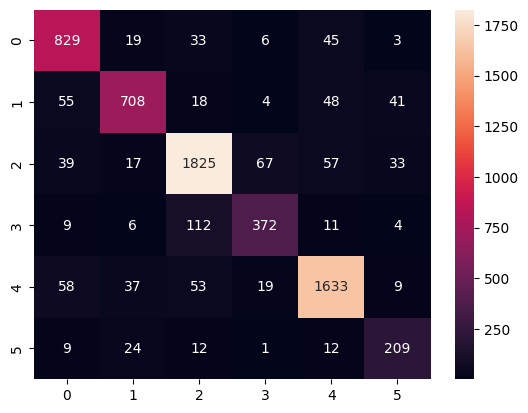

In [85]:
sns.heatmap(confusion_matrix(y_test,prediction),annot = True, fmt = 'd')


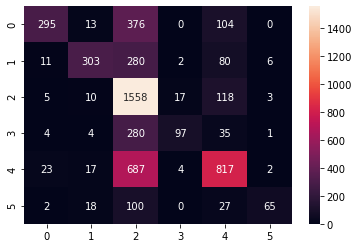

### Create classification report

In [87]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       935
           1       0.87      0.81      0.84       874
           2       0.89      0.90      0.89      2038
           3       0.79      0.72      0.76       514
           4       0.90      0.90      0.90      1809
           5       0.70      0.78      0.74       267

    accuracy                           0.87      6437
   macro avg       0.83      0.83      0.83      6437
weighted avg       0.87      0.87      0.87      6437



              precision    recall  f1-score   support

           0       0.87      0.37      0.52       788
           1       0.83      0.44      0.58       682
           2       0.47      0.91      0.62      1711
           3       0.81      0.23      0.36       421
           4       0.69      0.53      0.60      1550
           5       0.84      0.31      0.45       212

    accuracy                           0.58      5364
   macro avg       0.75      0.47      0.52      5364
weighted avg       0.68      0.58      0.57      5364

